
# Experiment Analysis (setup results)

Two blocks:
1) **Hessian eigenvalue tubes**: mean ¬± std across steps for sorted eigenvalues, **with index-range selection**.
2) **Many-runs PCA**: fit PCA on the sample-mean trajectory; plot PC pairs for all samples.


In [1]:

import os, json
from pathlib import Path
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#!/usr/bin/env python3
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA
#!/usr/bin/env python3
import torch, numpy as np, matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import os, math
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


## Hessians stats

In [2]:

# --- CONFIG ---
SETUP_NUM = 1
BASE_DIR = Path('./')
RESULTS_DIR = BASE_DIR / f'setup{SETUP_NUM}'

# Hessian LRs to analyze
LRS_HESS = [0.1, 0.01]

print("Using RESULTS_DIR =", RESULTS_DIR)


Using RESULTS_DIR = setup1


## –û—Ç–¥–µ–ª—å–Ω—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä –æ—Ç—Å–ª–µ–∂–∏–≤–∞–µ–º 


In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import os, math
import numpy as np
import torch
import matplotlib.pyplot as plt

# ============== –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ ==============
BASE_DIR = "./setup1"
LR_TO_USE = "0.01"  # "0.01" –∏–ª–∏ "0.1"
PATH = os.path.join(BASE_DIR, f"weights_lr{LR_TO_USE}.pt")  # –æ–∂–∏–¥–∞–µ–º shape [N, T, D]

W = torch.load(PATH, map_location="cpu")
W = W.detach().float()
N, T, D = W.shape
W.shape

torch.Size([1000, 1111, 386])

In [4]:
num_p = 383
p_trajectories = W[:,:,num_p].numpy()

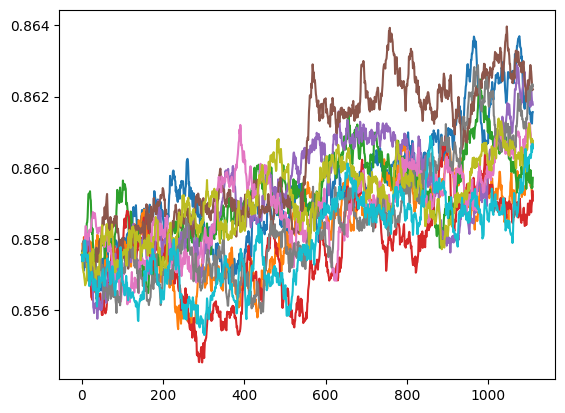

In [5]:
for num_sample in range(10):
    plt.plot(p_trajectories[num_sample,:])

mu_hat = 4.226108e-06 sigma_hat = 0.00019741963


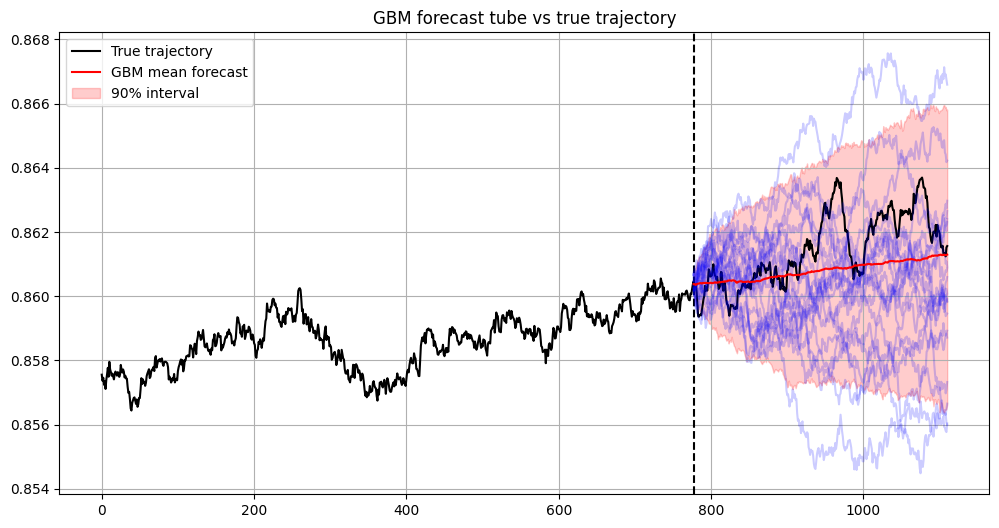

In [6]:

num_sample = 0   # –≤–æ–∑—å–º–µ–º –ø–µ—Ä–≤—É—é —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏—é –¥–ª—è –ø—Ä–∏–º–µ—Ä–∞
S = p_trajectories[num_sample, :]

# Train/Test —Å–ø–ª–∏—Ç
train_ratio = 0.7
split = int(len(S) * train_ratio)
S_train, S_test = S[:split], S[split:]
dt = 1.0  # –µ—Å–ª–∏ –¥–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü–∏—è —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–∞—è

# –õ–æ–≥-–¥–æ—Ö–æ–¥–Ω–æ—Å—Ç–∏
r = np.diff(np.log(S_train))

# –û—Ü–µ–Ω–∫–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ GBM
mu_hat = np.mean(r)/dt + 0.5*np.var(r)/dt
sigma_hat = np.sqrt(np.var(r)/dt)

print("mu_hat =", mu_hat, "sigma_hat =", sigma_hat)

# --- –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ "—Ç—Ä—É–±–∫–æ–π" ---
n_steps = len(S_test)
n_paths = 300  # —á–∏—Å–ª–æ —Å—ç–º–ø–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–π

paths = np.zeros((n_paths, n_steps))
for j in range(n_paths):
    S_pred = [S_train[-1]]
    for i in range(n_steps):
        dW = np.random.randn() * np.sqrt(dt)
        next_S = S_pred[-1] * np.exp((mu_hat - 0.5*sigma_hat**2)*dt + sigma_hat*dW)
        S_pred.append(next_S)
    paths[j,:] = S_pred[1:]

# –°—Ä–µ–¥–Ω–µ–µ –∏ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã
mean_path = paths.mean(axis=0)
low_path  = np.percentile(paths, 5, axis=0)
high_path = np.percentile(paths, 95, axis=0)

# --- –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è ---
plt.figure(figsize=(12,6))

# –ò—Å—Ç–∏–Ω–Ω–∞—è —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏—è
plt.plot(range(len(S)), S, label="True trajectory", color="black")

# Train/Test split
plt.axvline(split, color="k", linestyle="--")

# –ù–µ—Å–∫–æ–ª—å–∫–æ —Å—ç–º–ø–ª–æ–≤ –∏–∑ —Ç—Ä—É–±–∫–∏
for j in range(20):
    plt.plot(range(split, len(S)), paths[j,:], color="blue", alpha=0.2)

# –°—Ä–µ–¥–Ω—è—è –∏ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã
plt.plot(range(split, len(S)), mean_path, color="red", label="GBM mean forecast")
plt.fill_between(range(split, len(S)), low_path, high_path, color="red", alpha=0.2, label="90% interval")

plt.legend()
plt.grid(True)
plt.title("GBM forecast tube vs true trajectory")
plt.show()


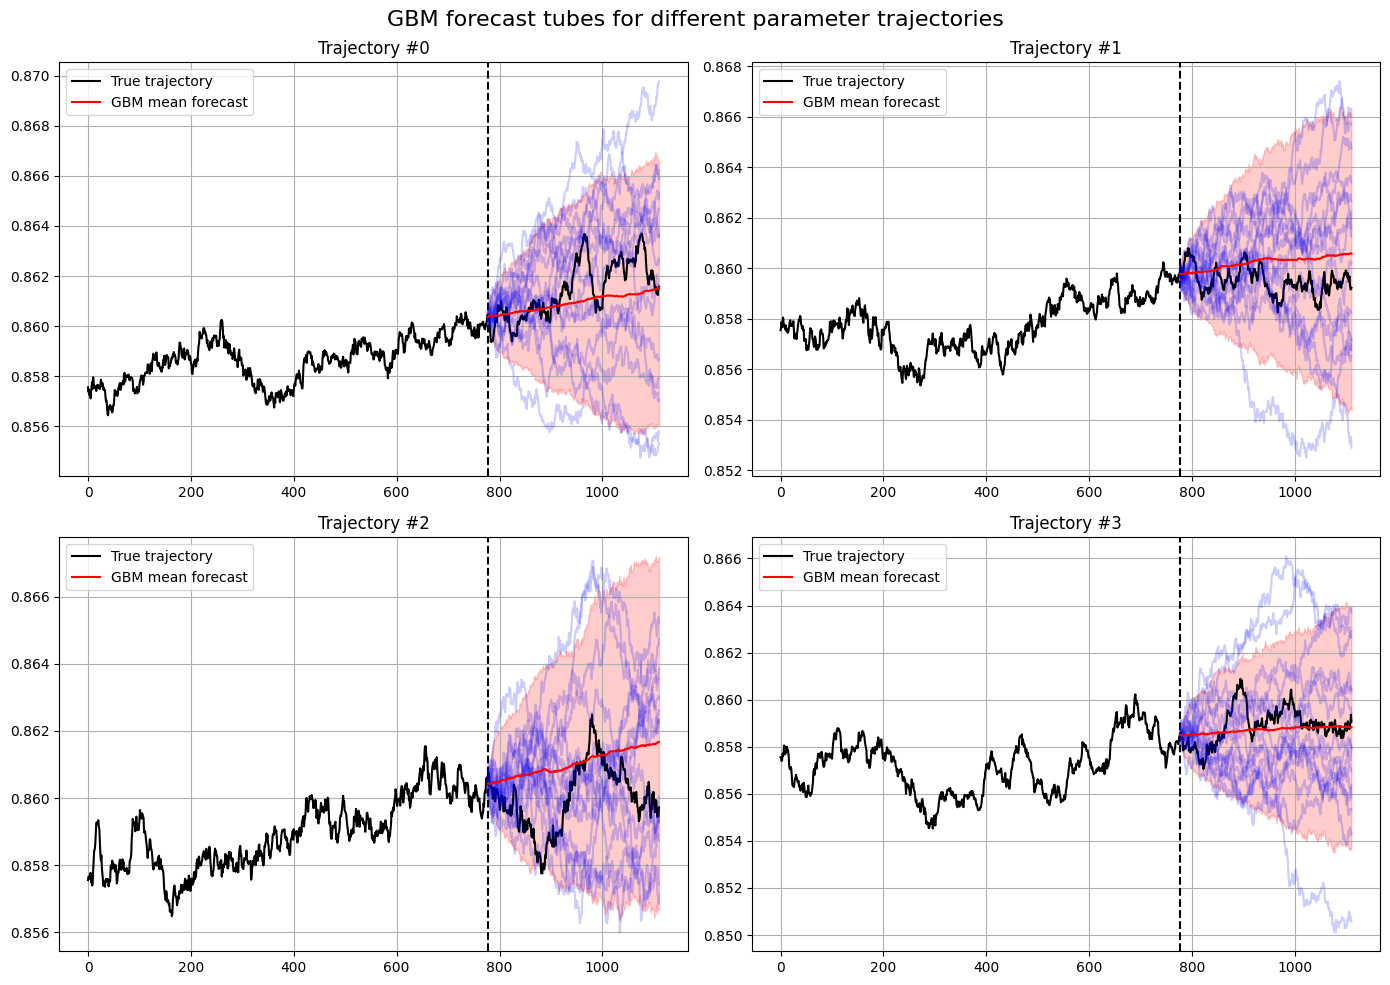

In [7]:
def fit_and_forecast(S, train_ratio=0.7, dt=1.0, n_paths=300):
    split = int(len(S) * train_ratio)
    S_train, S_test = S[:split], S[split:]

    # –õ–æ–≥-–¥–æ—Ö–æ–¥–Ω–æ—Å—Ç–∏
    r = np.diff(np.log(S_train))

    # –û—Ü–µ–Ω–∫–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ GBM
    mu_hat = np.mean(r)/dt + 0.5*np.var(r)/dt
    sigma_hat = np.sqrt(np.var(r)/dt)

    # –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ "—Ç—Ä—É–±–∫–æ–π"
    n_steps = len(S_test)
    paths = np.zeros((n_paths, n_steps))
    for j in range(n_paths):
        S_pred = [S_train[-1]]
        for i in range(n_steps):
            dW = np.random.randn() * np.sqrt(dt)
            next_S = S_pred[-1] * np.exp((mu_hat - 0.5*sigma_hat**2)*dt + sigma_hat*dW)
            S_pred.append(next_S)
        paths[j, :] = S_pred[1:]

    return split, paths, S

# --- –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö ---
n_show = 4  # —á–∏—Å–ª–æ —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–π –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for idx, ax in enumerate(axs.flatten()[:n_show]):
    S = p_trajectories[idx, :]
    split, paths, S_true = fit_and_forecast(S)

    mean_path = paths.mean(axis=0)
    low_path  = np.percentile(paths, 5, axis=0)
    high_path = np.percentile(paths, 95, axis=0)

    # –ò—Å—Ç–∏–Ω–Ω–∞—è —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏—è
    ax.plot(range(len(S_true)), S_true, color="black", label="True trajectory")
    ax.axvline(split, color="k", linestyle="--")

    # –ù–µ—Å–∫–æ–ª—å–∫–æ —Å—ç–º–ø–ª–æ–≤ –∏–∑ —Ç—Ä—É–±–∫–∏
    for j in range(15):
        ax.plot(range(split, len(S_true)), paths[j,:], color="blue", alpha=0.2)

    # –°—Ä–µ–¥–Ω–∏–π –ø—Ä–æ–≥–Ω–æ–∑ –∏ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª
    ax.plot(range(split, len(S_true)), mean_path, color="red", label="GBM mean forecast")
    ax.fill_between(range(split, len(S_true)), low_path, high_path, color="red", alpha=0.2)

    ax.set_title(f"Trajectory #{idx}")
    ax.grid(True)
    ax.legend()

plt.suptitle("GBM forecast tubes for different parameter trajectories", fontsize=16)
plt.tight_layout()
plt.show()


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

def fit_trend_candidates(trajectories):
    num_samples, T = trajectories.shape
    t = np.arange(1, T+1)
    mean_real = trajectories.mean(axis=0)
    S0 = trajectories[0,0]

    candidates = {
        "-log(t)": (lambda t, beta: S0 - beta * np.log(t+1), [1.0]),
        "-log log(t)": (lambda t, beta: S0 - beta * np.log(np.log(t+2)), [1.0]),
        "power law": (lambda t, beta, gamma: S0 - beta * (t**gamma), [1.0, 0.5]),
        "rational": (lambda t, beta, c: S0 - beta/(t+c), [1.0, 1.0]),
        "exp power": (lambda t, beta, gamma: S0 * np.exp(-beta * (t**gamma)), [0.01, 0.5]),
        "log+power": (lambda t, beta1, gamma, beta2: S0 - beta1*(t**gamma) - beta2*np.log(t+1), [1.0, 0.5, 0.5]),
        "shifted log": (lambda t, beta, c: S0 - beta * np.log(t+c), [1.0, 2.0]),
        "logistic": (lambda t, beta, gamma: S0 / (1 + beta*(t**gamma)), [0.01, 0.5])
    }

    results = {}
    for name, (func, p0) in candidates.items():
        try:
            popt, _ = curve_fit(func, t, mean_real, p0=p0, maxfev=20000)
            y_fit = func(t, *popt)
            mse = mean_squared_error(mean_real, y_fit)
            results[name] = {"params": popt, "fit": y_fit, "mse": mse}
        except Exception as e:
            print(f"‚ö†Ô∏è –ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –ø–æ–¥–æ–≥–Ω–∞—Ç—å {name}: {e}")

    return t, mean_real, results

def fit_trend_candidates_fixed(trajectories):
    num_samples, T = trajectories.shape
    t = np.arange(1, T+1)
    mean_real = trajectories.mean(axis=0)
    S0 = trajectories[0,0]

    candidates = {
        "-log(t)": (lambda t, beta: S0 - beta * np.log(t+1), [1.0]),
        "power law": (lambda t, beta, gamma: S0 - beta * (t**gamma), [1.0, 0.5]),
        "rational": (lambda t, beta, c: S0 - beta/ (t+c) + beta/c, [1.0, 1.0]),
        "logistic": (lambda t, beta, gamma: S0 / (1 + beta*(t**gamma)), [0.01, 0.5])
    }

    results = {}
    for name, (func, p0) in candidates.items():
        try:
            popt, _ = curve_fit(func, t, mean_real, p0=p0, maxfev=20000)
            y_fit = func(t, *popt)
            mse = mean_squared_error(mean_real, y_fit)
            results[name] = {"params": popt, "fit": y_fit, "mse": mse}
        except Exception as e:
            print(f"‚ö†Ô∏è –ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –ø–æ–¥–æ–≥–Ω–∞—Ç—å {name}: {e}")

    return t, mean_real, results


def plot_trend_candidates(t, mean_real, results):
    plt.figure(figsize=(12,6))
    plt.plot(t, mean_real, label="Real mean", color="black", linewidth=2)
    for name, res in results.items():
        plt.plot(t, res["fit"], label=f"{name} (MSE={res['mse']:.4f})")
    plt.title("Trend fitting candidates")
    plt.xlabel("Time step")
    plt.ylabel("Mean trajectory")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_top_trends(t, mean_real, results, top_k=3):
    sorted_results = sorted(results.items(), key=lambda x: x[1]["mse"])
    top_results = sorted_results[:top_k]

    plt.figure(figsize=(12,6))
    # plt.plot(t, mean_real, label="Real mean", color="black", linewidth=2)
    for name, res in top_results:
        plt.plot(t, res["fit"], label=f"{name} (MSE={res['mse']:.4f})")

    plt.title(f"Top {top_k} trend fits")
    plt.xlabel("Time step")
    plt.ylabel("Mean trajectory")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"üèÜ Top {top_k} –ø–æ MSE:")
    for name, res in top_results:
        print(f"{name}: MSE={res['mse']:.4f}, params={res['params']}")

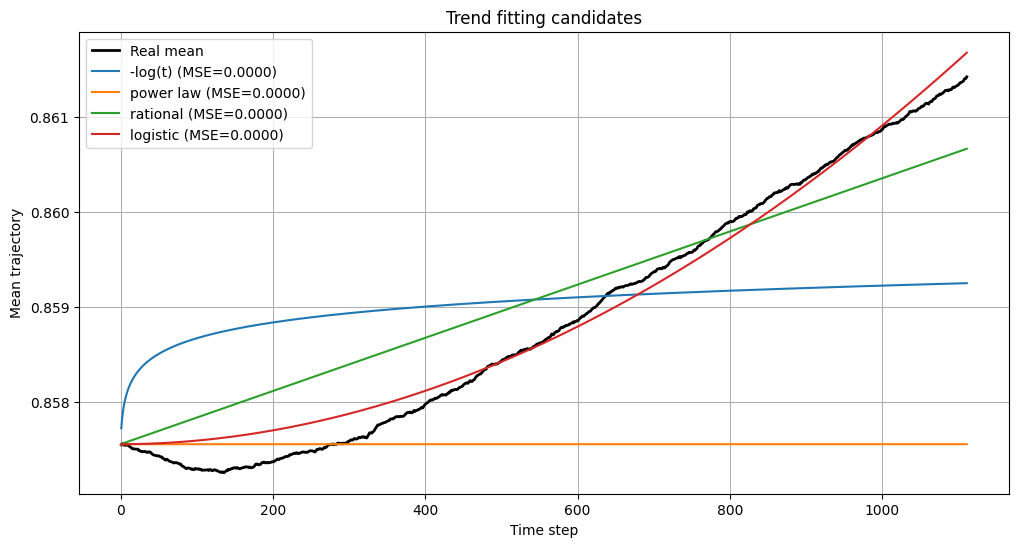

–†–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏–µ –ø–æ MSE:
logistic: MSE=0.0000, params=[-5.61815825e-09  1.94713682e+00]
rational: MSE=0.0000, params=[93157334.17339161  5765773.46621259]
-log(t): MSE=0.0000, params=[-0.00024186]
power law: MSE=0.0000, params=[ 6.01615054e-06 -2.07499600e+00]


In [9]:
t, mean_real, results = fit_trend_candidates_fixed(p_trajectories)
plot_trend_candidates(t, mean_real, results)

# –°–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ –ø–æ MSE
sorted_results = sorted(results.items(), key=lambda x: x[1]["mse"])
print("–†–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏–µ –ø–æ MSE:")
for name, res in sorted_results:
    print(f"{name}: MSE={res['mse']:.4f}, params={res['params']}")


## –†–∞—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π —Ç—Ä–µ–Ω–¥ –ª—É—á—à–µ –≤—Å–µ–≥–æ –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç—Å—è 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def fit_rational_trend(trajectories):
    """
    –§–∏—Ç —Ä–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ–≥–æ —Ç—Ä–µ–Ω–¥–∞ —Å —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–º —Å—Ç–∞—Ä—Ç–æ–º:
        f(t) = S0 - beta/(t+c) + beta/c
    –ø—Ä–∏ t=0 –≥–∞—Ä–∞–Ω—Ç–∏—Ä—É–µ—Ç f(0) = S0
    """
    num_samples, T = trajectories.shape
    t = np.arange(T)   # —Ç–µ–ø–µ—Ä—å –æ—Ç 0 –¥–æ T-1
    mean_real = trajectories.mean(axis=0)
    S0 = trajectories[0,0]

    def rational_trend(t, beta, c):
        return S0 - beta/(t+c) + beta/c

    popt, _ = curve_fit(rational_trend, t, mean_real, p0=[1.0, 1.0], maxfev=20000)
    beta_hat, c_hat = popt
    fitted_trend = rational_trend(t, beta_hat, c_hat)

    return S0, beta_hat, c_hat, fitted_trend


def detrend_trajectories(trajectories, fitted_trend):
    """
    –í—ã—á–∏—Ç–∞–µ—Ç —Ç—Ä–µ–Ω–¥ –∏–∑ –≤—Å–µ—Ö —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–π (—Ç–µ–ø–µ—Ä—å —Ä–∞–∑–º–µ—Ä—ã —Å–æ–≤–ø–∞–¥–∞—é—Ç).
    """
    return trajectories - fitted_trend



def plot_detrended(detrended, title="Trajectories after rational detrending"):
    plt.figure(figsize=(12,6))
    for s in detrended:
        plt.plot(s, alpha=0.3, color="black")
    plt.axhline(0, color="red", linestyle="--")
    plt.title(title)
    plt.xlabel("Time step")
    plt.ylabel("Deviation from trend")
    plt.grid(True)
    plt.show()


S0=0.858, beta=63260190.264, c=4747575.003


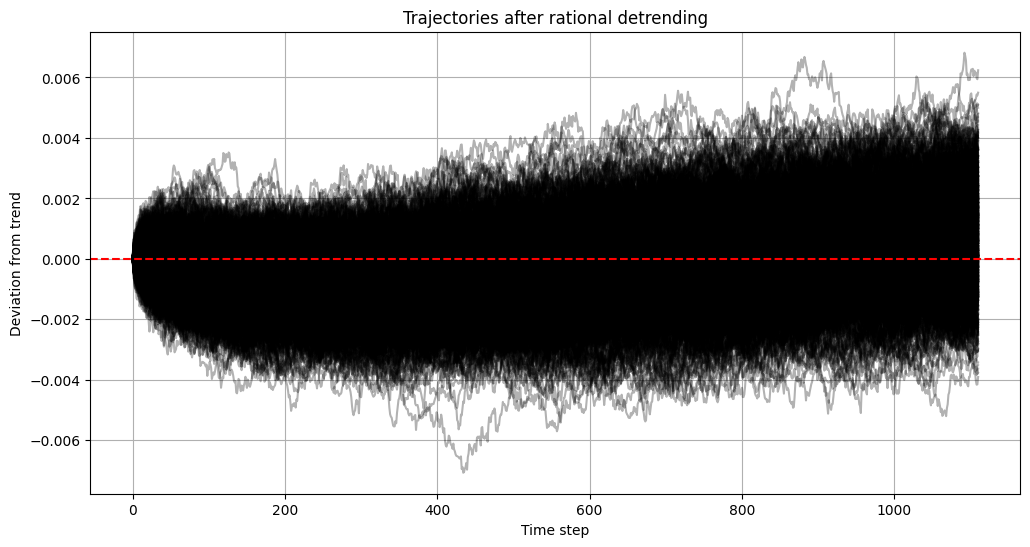

In [11]:
# 1. –§–∏—Ç–∏–º —Ä–∞—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π —Ç—Ä–µ–Ω–¥
S0, beta_hat, c_hat, fitted_trend = fit_rational_trend(p_trajectories)
print(f"S0={S0:.3f}, beta={beta_hat:.3f}, c={c_hat:.3f}")

# 2. –£–±–∏—Ä–∞–µ–º —Ç—Ä–µ–Ω–¥
detrended = detrend_trajectories(p_trajectories, fitted_trend)

# 3. –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º
plot_detrended(detrended)


* –î–∞–ª—å—à–µ –±—É–¥–µ–º –æ—Ü–µ–Ω–∏–≤–∞—Ç—å –∏–º–µ–Ω–Ω–æ —Ä–µ–∞–ª—å–Ω—ã–π –¥–µ—Ç–µ—Ä–µ–Ω–¥ -- —ã—á–∏—Ç–∞–Ω–∏–µ —Å—Ä–¥–µ–Ω–µ–≥–æ, –∞ –Ω–µ –æ—É–µ–Ω–µ–Ω–Ω—ã–π —Ç—Ä–µ–Ω–¥

In [12]:
detrended = p_trajectories - p_trajectories.mean(axis=0)

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_sigma_wiener(detrended, dt=1.0):
    """
    –û—Ü–µ–Ω–∫–∞ sigma –¥–ª—è –≤–∏–Ω–µ—Ä–æ–≤—Å–∫–æ–≥–æ –ø—Ä–æ—Ü–µ—Å—Å–∞ –ø–æ –ø—Ä–∏—Ä–∞—â–µ–Ω–∏—è–º –¥–µ—Ç—Ä–µ–Ω–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–π
    """
    increments = detrended[:,1:] - detrended[:,:-1]
    var = np.var(increments, ddof=1)
    sigma_hat = np.sqrt(var / dt)
    return sigma_hat


def simulate_wiener_paths(sigma, n_paths, n_steps, dt=1.0, random_state=None):
    """
    –°–∏–º—É–ª—è—Ü–∏—è –≤–∏–Ω–µ—Ä–æ–≤—Å–∫–∏—Ö —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–π —Å –¥–∏—Å–ø–µ—Ä—Å–∏–µ–π sigma^2 t
    """
    rng = np.random.default_rng(random_state)
    dW = rng.normal(0, np.sqrt(dt), size=(n_paths, n_steps-1))
    W = np.zeros((n_paths, n_steps))
    W[:,1:] = np.cumsum(sigma * dW, axis=1)
    return W


def plot_real_vs_wiener(detrended, sigma_hat, simulated):
    """
    –î–≤–∞ subplot-–∞: —Å–ª–µ–≤–∞ —Ä–µ–∞–ª—å–Ω—ã–µ —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–∏, —Å–ø—Ä–∞–≤–∞ ‚Äî —Å–º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –≤–∏–Ω–µ—Ä–æ–≤—Å–∫–∏–µ
    """
    fig, axs = plt.subplots(1, 2, figsize=(14,6))

    # —Ä–µ–∞–ª—å–Ω—ã–µ
    for s in detrended:
        axs[0].plot(s, alpha=0.3, color="black")
    axs[0].set_title(f"Real detrended trajectories\nEstimated œÉ={sigma_hat:.3f}")
    axs[0].set_xlabel("Time step")
    axs[0].set_ylabel("Deviation from trend")
    axs[0].grid(True)

    # —Å–º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ
    for s in simulated:
        axs[1].plot(s, alpha=0.3, color="red")
    axs[1].set_title(f"Simulated Wiener trajectories\nœÉ={sigma_hat:.3f}")
    axs[1].set_xlabel("Time step")
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()


Estimated sigma = 0.00017325378


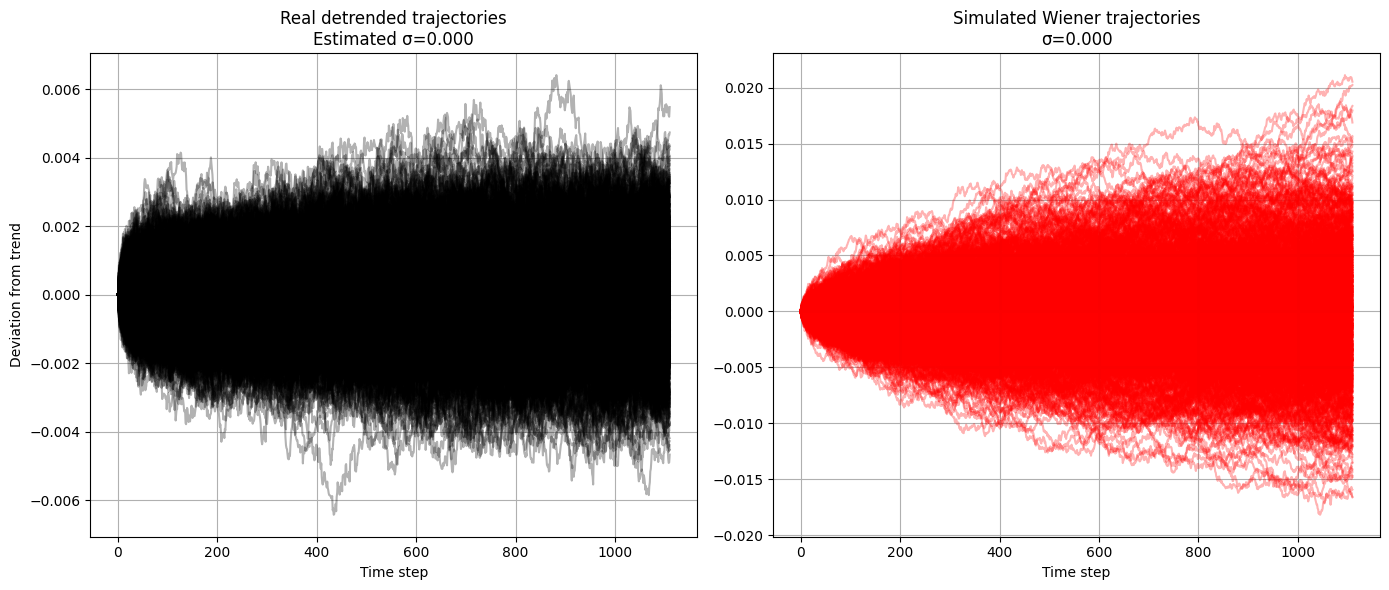

In [14]:
# 1. –û—Ü–µ–Ω–∫–∞ sigma
sigma_hat = estimate_sigma_wiener(detrended, dt=1.0)
print("Estimated sigma =", sigma_hat)

# 2. –°–∏–º—É–ª—è—Ü–∏—è –≤–∏–Ω–µ—Ä–æ–≤—Å–∫–∏—Ö —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–π
n_paths, n_steps = detrended.shape
simulated = simulate_wiener_paths(sigma_hat, n_paths, n_steps, dt=1.0, random_state=42)

# 3. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plot_real_vs_wiener(detrended, sigma_hat, simulated)


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_increments_histogram(detrended, bins=50):
    """
    –°—Ç—Ä–æ–∏—Ç –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É –ø—Ä–∏—Ä–∞—â–µ–Ω–∏–π –ø–æ –≤—Å–µ–º —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏—è–º –∏ –Ω–∞–∫–ª–∞–¥—ã–≤–∞–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ.
    """
    # –ø—Ä–∏—Ä–∞—â–µ–Ω–∏—è
    increments = detrended[:,1:] - detrended[:,:-1]
    increments = increments.flatten()

    # –æ—Ü–µ–Ω–∫–∏ —Å—Ä–µ–¥–Ω–µ–≥–æ –∏ sigma
    mu_hat = np.mean(increments)
    sigma_hat = np.std(increments, ddof=1)

    # –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞
    plt.figure(figsize=(10,6))
    plt.hist(increments, bins=bins, density=True, alpha=0.6, color="black", label="Empirical increments")

    # –Ω–æ—Ä–º–∞–ª—å–Ω–∞—è –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏—è
    x = np.linspace(increments.min(), increments.max(), 500)
    pdf = norm.pdf(x, mu_hat, sigma_hat)
    plt.plot(x, pdf, "r-", linewidth=2, label=f"Normal fit (Œº={mu_hat:.3e}, œÉ={sigma_hat:.3e})")

    plt.title("Histogram of increments (detrended trajectories)")
    plt.xlabel("Increment value")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

    return mu_hat, sigma_hat


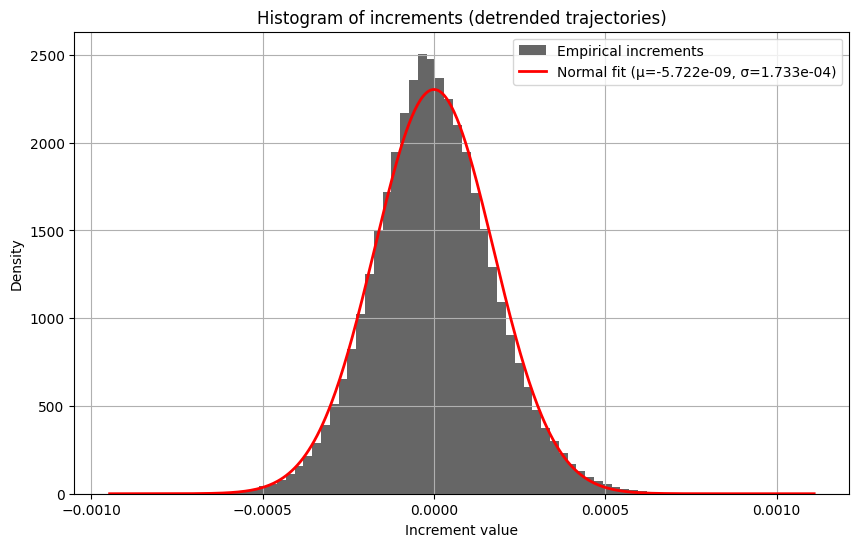

Estimated increments: mean=-5.7220e-09, sigma=1.7325e-04


In [16]:
mu_hat, sigma_hat = plot_increments_histogram(detrended, bins=80)
print(f"Estimated increments: mean={mu_hat:.4e}, sigma={sigma_hat:.4e}")


* –ø—Ä–∏—Ä–∞—â–µ–Ω–∏—è –ø–æ—Ö–æ–¥–∏ –Ω–∞ –Ω–æ—Ä–º–ª–∞—å–Ω—ã–µ, –Ω–æ –≤–∏–Ω–µ—Ä–æ–≤—Å–∫–∏–º –ø–ª–æ–∑–æ –æ—Ü–µ–Ω–∏–≤–∞—é—Ç—Å—è 

* –≤–µ—Ä–æ—è—Ç–Ω–æ –æ–Ω–∏ –∏–º–µ—é—Ç —Ä–∞–∑–Ω—ã–µ —Å–∏–≥–º—ã –ø–æ –≤—Ä–µ–º–µ–Ω–∏ 

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_increments_histogram_overlay(detrended, bins=50):
    """
    –†–∏—Å—É–µ—Ç –Ω–∞ –æ–¥–Ω–æ–º –≥—Ä–∞—Ñ–∏–∫–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –ø—Ä–∏—Ä–∞—â–µ–Ω–∏–π:
    - –≤ –Ω–∞—á–∞–ª–µ
    - –≤ —Å–µ—Ä–µ–¥–∏–Ω–µ
    - –≤ –∫–æ–Ω—Ü–µ
    —Å –Ω–∞–ª–æ–∂–µ–Ω–Ω—ã–º–∏ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º–∏ –∫—Ä–∏–≤—ã–º–∏.
    """
    n_paths, T = detrended.shape
    thirds = [0, T//3, 2*T//3, T]
    colors = ["blue", "green", "red"]
    labels = ["Start", "Middle", "End"]

    plt.figure(figsize=(10,6))

    for i in range(3):
        # –ø—Ä–∏—Ä–∞—â–µ–Ω–∏—è –¥–ª—è —Å–µ–≥–º–µ–Ω—Ç–∞
        increments = detrended[:, thirds[i]+1:thirds[i+1]] - detrended[:, thirds[i]:thirds[i+1]-1]
        increments = increments.flatten()

        # –æ—Ü–µ–Ω–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
        mu_hat = np.mean(increments)
        sigma_hat = np.std(increments, ddof=1)

        # –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ (–ø—Ä–æ–∑—Ä–∞—á–Ω–∞—è)
        plt.hist(increments, bins=bins, density=True, alpha=0.3, color=colors[i], label=f"{labels[i]} data")

        # –Ω–æ—Ä–º–∞–ª—å–Ω–∞—è –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏—è
        x = np.linspace(increments.min(), increments.max(), 500)
        pdf = norm.pdf(x, mu_hat, sigma_hat)
        plt.plot(x, pdf, color=colors[i], linewidth=2, label=f"{labels[i]} N({mu_hat:.2e}, {sigma_hat:.2e})")

    plt.title("Increment distributions: start vs middle vs end")
    plt.xlabel("Increment value")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()


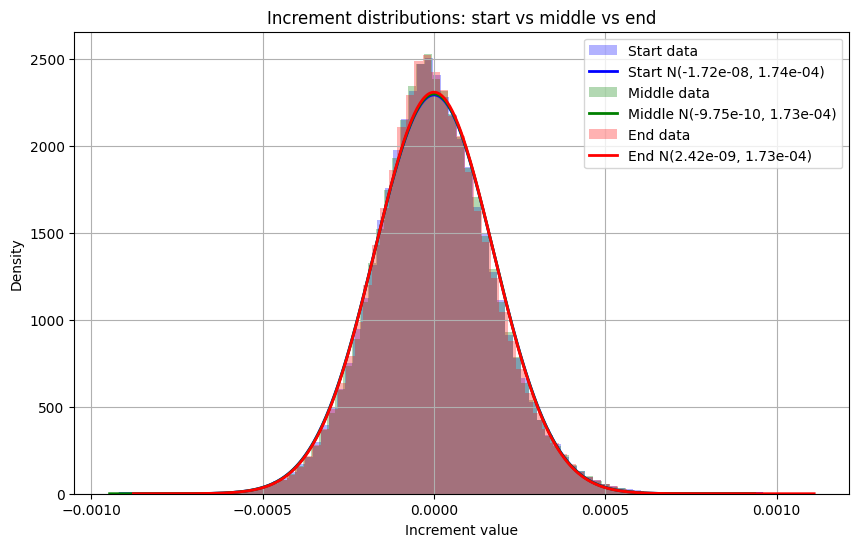

In [18]:
plot_increments_histogram_overlay(detrended, bins=80)


* —Ö–º –æ–∫–∞–∑–∞–ª–æ—Å—å –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç—å –Ω–µ –º–µ–Ω—è–µ—Ç—Å—è –ø–æ –≤—Ä–µ–º–µ–Ω–∏ 
* –í–µ—Ä–æ—è—Ç–Ω–æ –ø—Ä–∏—Ä–∞—â–µ–Ω–∏—è —Å–∫–æ—Ä–µ–ª–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ 

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def estimate_hurst_and_sigma(detrended):
    """
    –û—Ü–µ–Ω–∫–∞ H –∏ sigma —á–µ—Ä–µ–∑ –¥–∏—Å–ø–µ—Ä—Å–∏—é –≤–æ –≤—Ä–µ–º–µ–Ω–∏.
    """
    n_paths, T = detrended.shape
    t = np.arange(1, T+1)
    var_t = detrended.var(axis=0)

    def var_model(t, sigma, H):
        return (sigma**2) * (t**(2*H))

    popt, _ = curve_fit(var_model, t, var_t, p0=[1.0, 0.5], bounds=(0, np.inf))
    sigma_hat, H_hat = popt
    return sigma_hat, H_hat, t, var_t, var_model(t, *popt)


def simulate_fbm(H, sigma, n_paths, n_steps, dt=1.0, random_state=None):
    """
    –°–∏–º—É–ª—è—Ü–∏—è fBM —Å –º–∞—Å—à—Ç–∞–±–æ–º sigma.
    """
    rng = np.random.default_rng(random_state)
    t = np.arange(n_steps) * dt

    def cov(i, j):
        return 0.5 * ( (abs(i*dt))**(2*H) + (abs(j*dt))**(2*H) - (abs(i-j)*dt)**(2*H) )

    C = np.fromfunction(np.vectorize(cov), (n_steps, n_steps), dtype=int)
    L = np.linalg.cholesky(C + 1e-12*np.eye(n_steps))

    sims = []
    for _ in range(n_paths):
        z = rng.normal(0, 1, size=n_steps)  # —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–π –Ω–æ—Ä–º–∞–ª—å–Ω—ã–π
        sims.append(sigma * (L @ z))        # –º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º –Ω–∞ sigma
    return np.array(sims)


Estimated H=0.001, sigma=0.001


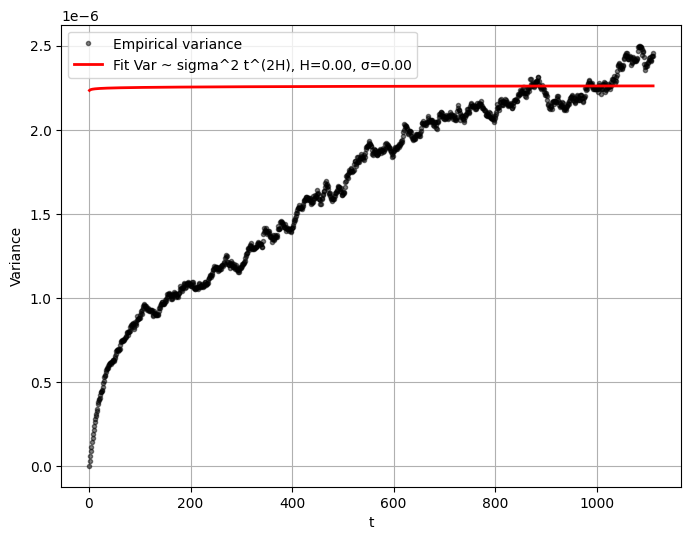

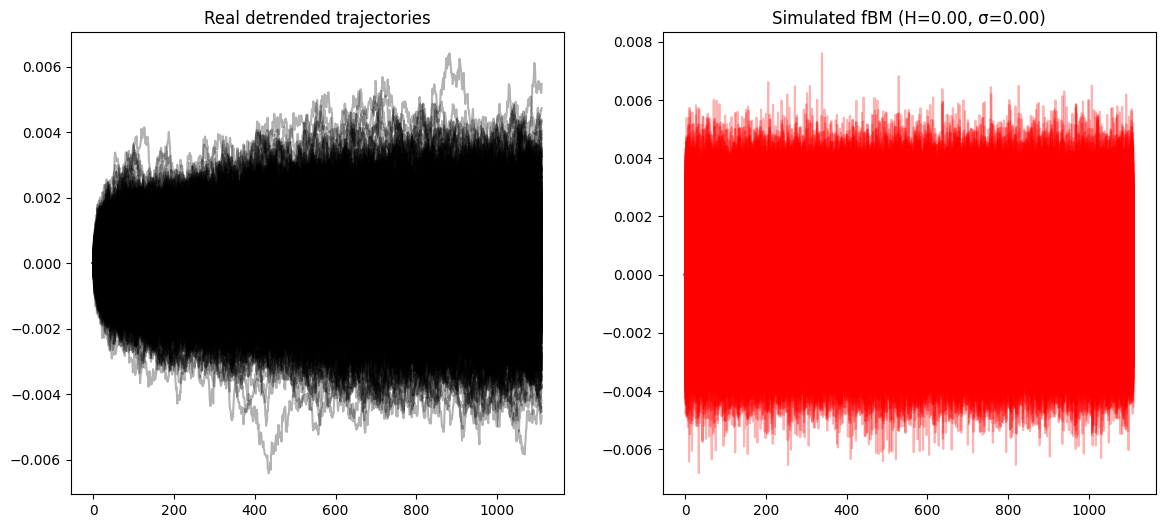

In [20]:
# 1. –§–∏—Ç H –∏ sigma
sigma_hat, H_hat, t, var_emp, var_fit = estimate_hurst_and_sigma(detrended)
print(f"Estimated H={H_hat:.3f}, sigma={sigma_hat:.3f}")

# 2. –°–∏–º—É–ª—è—Ü–∏—è fBM
n_paths, n_steps = detrended.shape
sim_fbm = simulate_fbm(H_hat, sigma_hat, n_paths=1000, n_steps=n_steps, random_state=42)

# 3. –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –¥–∏—Å–ø–µ—Ä—Å–∏–π
plt.figure(figsize=(8,6))
plt.plot(t, var_emp, "k.", alpha=0.5, label="Empirical variance")
plt.plot(t, var_fit, "r-", linewidth=2, label=f"Fit Var ~ sigma^2 t^(2H), H={H_hat:.2f}, œÉ={sigma_hat:.2f}")
plt.xlabel("t")
plt.ylabel("Variance")
plt.legend()
plt.grid(True)
plt.show()

# 4. –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–π
fig, axs = plt.subplots(1,2, figsize=(14,6))
for s in detrended:
    axs[0].plot(s, alpha=0.3, color="black")
axs[0].set_title("Real detrended trajectories")

for s in sim_fbm:
    axs[1].plot(s, alpha=0.3, color="red")
axs[1].set_title(f"Simulated fBM (H={H_hat:.2f}, œÉ={sigma_hat:.2f})")

plt.show()


* –¥–æ–∞–±–≤–∏–º –∫–∞–ª–∏–±—Ä–æ–≤–∫—É

Raw estimates: H=0.001, sigma=0.001
Calibrated sigma=0.002


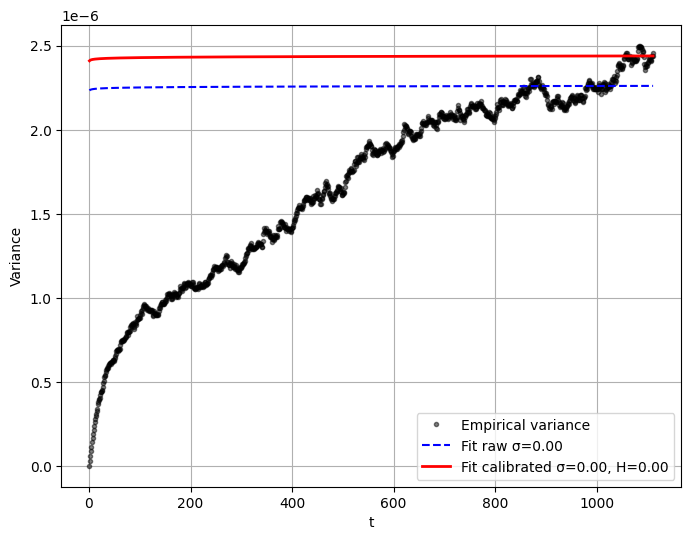

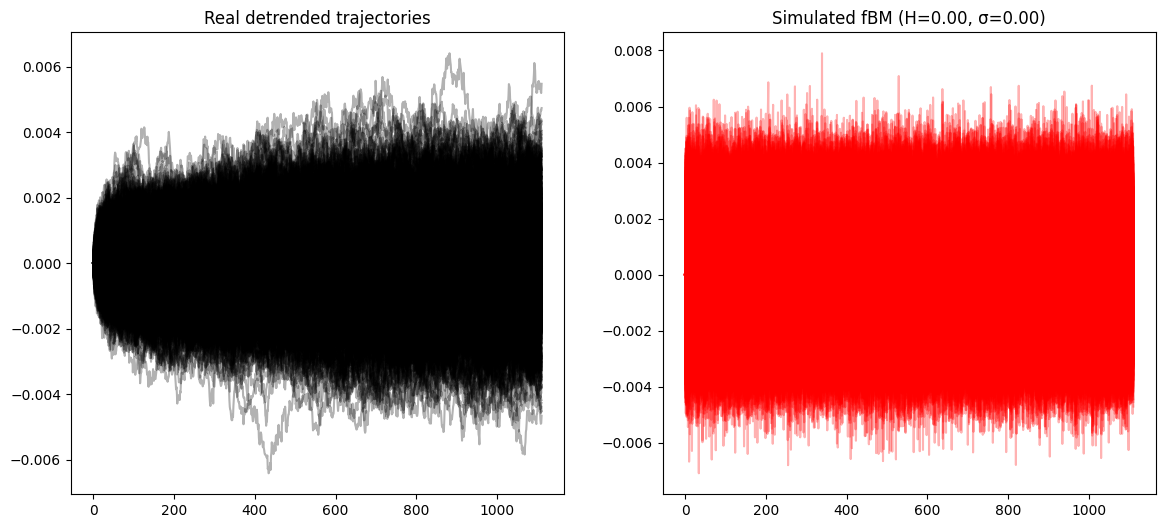

In [21]:


def estimate_hurst_and_sigma(detrended):
    """
    –û—Ü–µ–Ω–∫–∞ H –∏ sigma —á–µ—Ä–µ–∑ –¥–∏—Å–ø–µ—Ä—Å–∏—é –≤–æ –≤—Ä–µ–º–µ–Ω–∏.
    """
    n_paths, T = detrended.shape
    t = np.arange(1, T+1)
    var_t = detrended.var(axis=0)

    def var_model(t, sigma, H):
        return (sigma**2) * (t**(2*H))

    popt, _ = curve_fit(var_model, t, var_t, p0=[1.0, 0.5], bounds=(0, np.inf))
    sigma_hat, H_hat = popt
    return sigma_hat, H_hat, t, var_t, var_model(t, *popt)


def calibrate_sigma(var_emp, H_hat):
    """
    –ö–∞–ª–∏–±—Ä–æ–≤–∫–∞ sigma –ø–æ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –≤ –ø–æ—Å–ª–µ–¥–Ω–µ–π —Ç–æ—á–∫–µ.
    """
    T = len(var_emp)
    sigma_calib = np.sqrt(var_emp[-1] / (T**(2*H_hat)))
    return sigma_calib


def simulate_fbm(H, sigma, n_paths, n_steps, dt=1.0, random_state=None):
    """
    –°–∏–º—É–ª—è—Ü–∏—è fBM —Å –º–∞—Å—à—Ç–∞–±–æ–º sigma.
    """
    rng = np.random.default_rng(random_state)
    t = np.arange(n_steps) * dt

    def cov(i, j):
        return 0.5 * ( (abs(i*dt))**(2*H) + (abs(j*dt))**(2*H) - (abs(i-j)*dt)**(2*H) )

    C = np.fromfunction(np.vectorize(cov), (n_steps, n_steps), dtype=int)
    L = np.linalg.cholesky(C + 1e-12*np.eye(n_steps))

    sims = []
    for _ in range(n_paths):
        z = rng.normal(0, 1, size=n_steps)  # —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–π –Ω–æ—Ä–º–∞–ª—å–Ω—ã–π
        sims.append(sigma * (L @ z))        # –º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º –Ω–∞ sigma
    return np.array(sims)


# 1. –§–∏—Ç H –∏ sigma (–º–µ—Ç–æ–¥ –º–æ–º–µ–Ω—Ç–æ–≤)
sigma_hat, H_hat, t, var_emp, var_fit = estimate_hurst_and_sigma(detrended)
print(f"Raw estimates: H={H_hat:.3f}, sigma={sigma_hat:.3f}")

# 2. –ö–∞–ª–∏–±—Ä–æ–≤–∫–∞ sigma –ø–æ –ø–æ—Å–ª–µ–¥–Ω–µ–π —Ç–æ—á–∫–µ
sigma_calib = calibrate_sigma(var_emp, H_hat)
print(f"Calibrated sigma={sigma_calib:.3f}")

# 3. –°–∏–º—É–ª—è—Ü–∏—è fBM —Å –∫–∞–ª–∏–±—Ä–æ–≤–∞–Ω–Ω—ã–º sigma
n_paths, n_steps = detrended.shape
sim_fbm = simulate_fbm(H_hat, sigma_calib, n_paths=1000, n_steps=n_steps, random_state=42)

# 4. –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –¥–∏—Å–ø–µ—Ä—Å–∏–π
var_fit_calib = (sigma_calib**2) * (t**(2*H_hat))

plt.figure(figsize=(8,6))
plt.plot(t, var_emp, "k.", alpha=0.5, label="Empirical variance")
plt.plot(t, var_fit, "b--", linewidth=1.5, label=f"Fit raw œÉ={sigma_hat:.2f}")
plt.plot(t, var_fit_calib, "r-", linewidth=2, label=f"Fit calibrated œÉ={sigma_calib:.2f}, H={H_hat:.2f}")
plt.xlabel("t")
plt.ylabel("Variance")
plt.legend()
plt.grid(True)
plt.show()

# 5. –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–π
fig, axs = plt.subplots(1,2, figsize=(14,6))
for s in detrended:
    axs[0].plot(s, alpha=0.3, color="black")
axs[0].set_title("Real detrended trajectories")

for s in sim_fbm:
    axs[1].plot(s, alpha=0.3, color="red")
axs[1].set_title(f"Simulated fBM (H={H_hat:.2f}, œÉ={sigma_calib:.2f})")

plt.show()


Raw estimates: H=0.237, sigma=0.000
Calibrated sigma=0.000


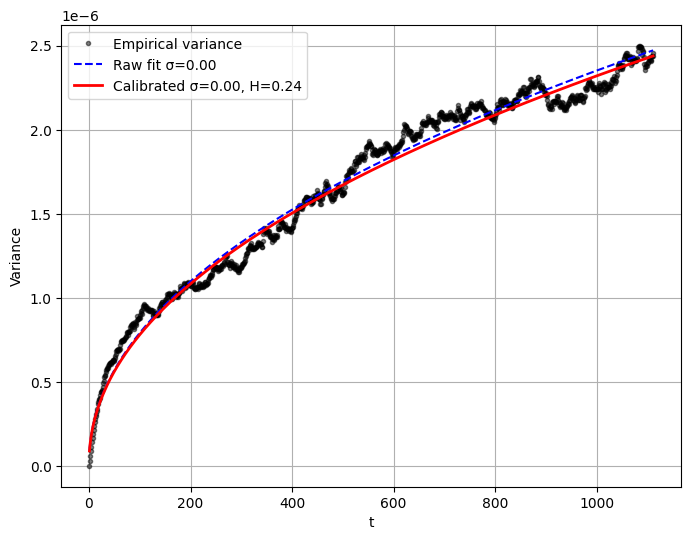

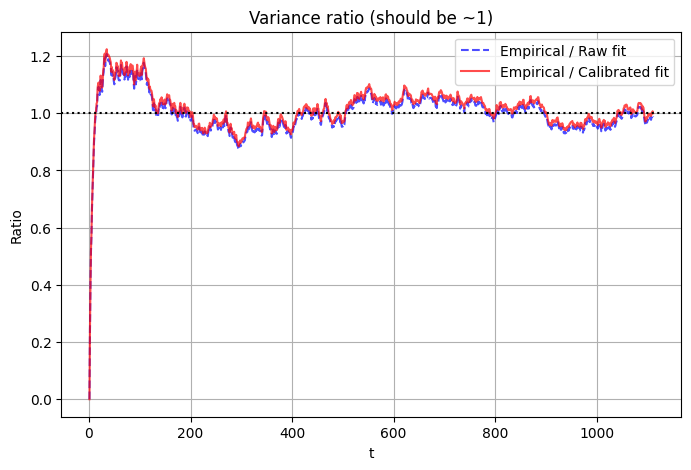

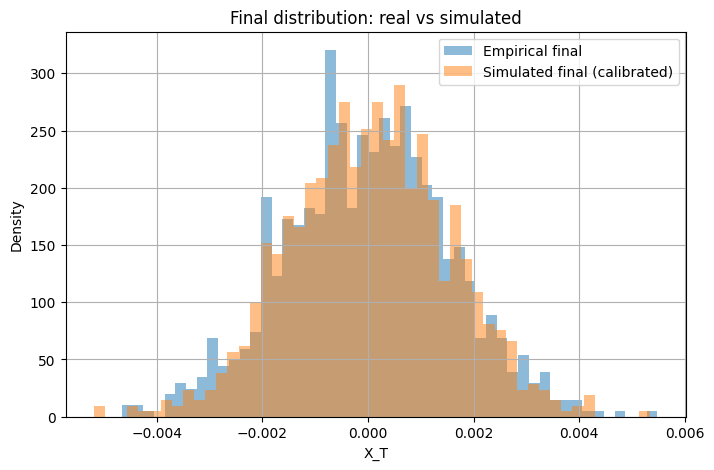

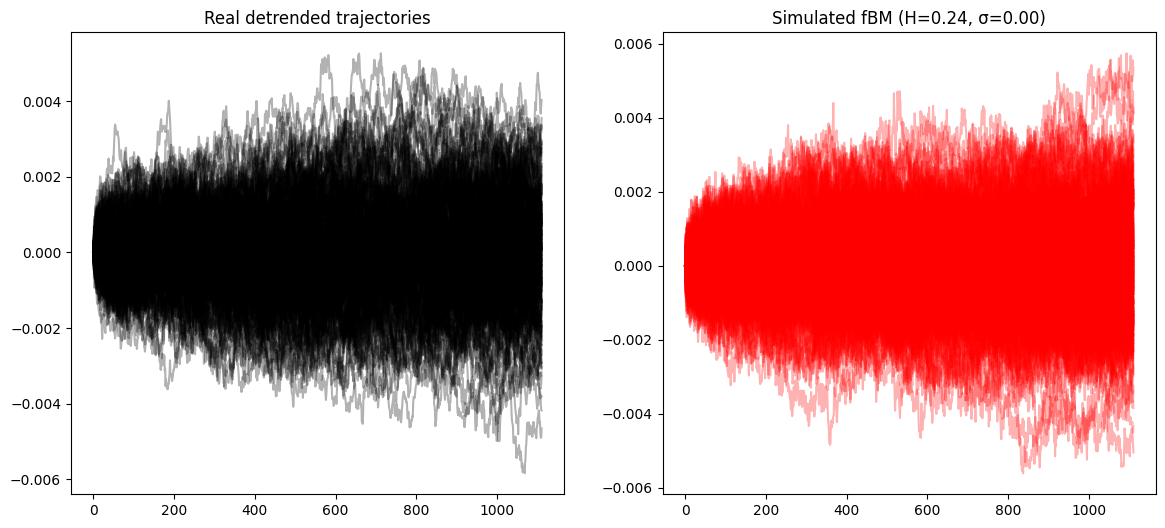

In [23]:
fbm_visualize(detrended, n_sim=1000)
